In [5]:
import pandas as pd

In [7]:
data = pd.read_csv('HR_comma_sep.csv.txt')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
data.rename(columns={'sales':'dept'}, inplace=True)

In [9]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# Preprocessing

In [12]:
data.select_dtypes('object').columns

Index(['dept', 'salary'], dtype='object')

In [13]:
data.dept.value_counts()

dept
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
     

In [15]:
le = LabelEncoder()

In [16]:
dept = le.fit_transform(data.dept)
     

In [17]:
ohe = OneHotEncoder()

In [18]:
ohe_dept = ohe.fit_transform(dept.reshape(-1,1))

In [19]:
le.classes_

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

In [20]:
dept_df = pd.DataFrame(ohe_dept.toarray(), dtype=int,columns=le.classes_)
     

In [21]:
data['salary_tf'] = data.salary.map({'low':1,'medium':2,'high':3})

In [22]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [23]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary', 'salary_tf'],
      dtype='object')

<Axes: ylabel='Density'>

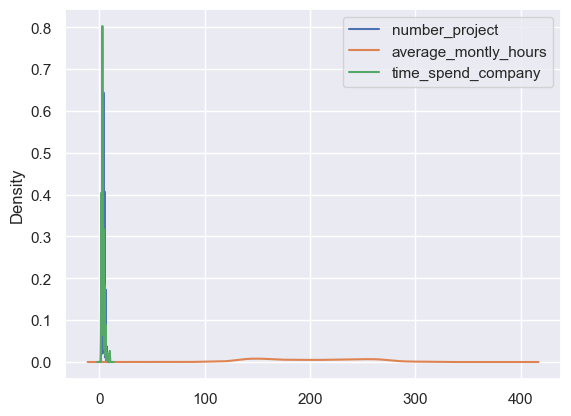

In [24]:
df = data[['number_project','average_montly_hours', 'time_spend_company']]
df.plot.kde()

In [25]:
mm = MinMaxScaler()

In [26]:
scaled_np = mm.fit_transform(df)

In [27]:
dept_np = dept_df.values

In [28]:
emp_df = data[['satisfaction_level','last_evaluation','Work_accident','promotion_last_5years','salary_tf']]
     


In [29]:
emp_np = emp_df.values

In [30]:
feature_data = np.hstack([emp_np, scaled_np, dept_np])
     

In [31]:
target_data = data.left
     

In [32]:
feature_data.shape

(14999, 18)

In [33]:
target_data.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [ ]:
# Model Building

In [34]:
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier

In [35]:
models = [ LogisticRegression(class_weight='balanced'), SGDClassifier(max_iter=10), PassiveAggressiveClassifier(max_iter=20), RandomForestClassifier(n_estimators=20)]


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
trainX,testX,trainY,testY = train_test_split(feature_data,target_data)
     

In [38]:
for model in models:
    model.fit(trainX,trainY)
    print (model.score(testX,testY))

0.7610666666666667
0.8133333333333334
0.7656


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.9896
